In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

## Import the CSV data as Pandas dataframe

In [3]:
df = pd.read_csv('data/dataset_med.csv')

In [4]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [5]:
df.shape

(890000, 17)

In [6]:
df.isna().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [7]:

df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [9]:

df.nunique()

id                    890000
age                       95
gender                     2
country                   27
diagnosis_date          3651
cancer_stage               4
family_history             2
smoking_status             4
bmi                      291
cholesterol_level        151
hypertension               2
asthma                     2
cirrhosis                  2
other_cancer               2
treatment_type             4
end_treatment_date      4194
survived                   2
dtype: int64

In [10]:

df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014127,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['id', 'age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived']

We have 8 categorical features : ['gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type', 'end_treatment_date']


In [12]:
df['start_date']= pd.to_datetime(df['diagnosis_date'])
df['end_date']= pd.to_datetime(df['end_treatment_date'])

df['treatment_duration'] = df['end_date'] - df['start_date']

df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,start_date,end_date,treatment_duration
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,2016-04-05,2017-09-10,523 days
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,2023-04-20,2024-06-17,424 days
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,2023-04-05,2024-04-09,370 days
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,2016-02-05,2017-04-23,443 days
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,2023-11-29,2025-01-08,406 days


In [13]:
df.drop(['diagnosis_date','end_treatment_date','start_date','end_date'], axis=1, inplace=True)

df.head()

,id,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration
0,1,64.0,Male,Sweden,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0,523 days
1,2,50.0,Female,Netherlands,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1,424 days
2,3,65.0,Female,Hungary,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0,370 days
3,4,51.0,Female,Belgium,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0,443 days
4,5,37.0,Male,Luxembourg,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0,406 days


In [14]:
gender_surv_perc = df.groupby('gender')['survived'].mean()*100

print(gender_surv_perc)

gender
Female    21.991341
Male      22.054482
Name: survived, dtype: float64


In [15]:
df['gender'].value_counts()

gender
Male      445134
Female    444866
Name: count, dtype: int64

In [16]:
country_surv_perc = df.groupby('country')['survived'].mean()*100

print(country_surv_perc)

country
Austria           21.786672
Belgium           21.957800
Bulgaria          22.036918
Croatia           21.989861
Cyprus            22.039182
Czech Republic    22.292839
Denmark           21.941618
Estonia           22.311738
Finland           22.245259
France            21.575951
Germany           22.100789
Greece            21.950260
Hungary           21.988418
Ireland           21.902355
Italy             21.649266
Latvia            22.250883
Lithuania         21.898588
Luxembourg        22.211380
Malta             22.255522
Netherlands       22.260896
Poland            22.103857
Portugal          22.199470
Romania           22.200649
Slovakia          21.736219
Slovenia          22.042115
Spain             22.090067
Sweden            21.606707
Name: survived, dtype: float64


In [17]:
smoking_status_surv_perc = df.groupby('smoking_status')['survived'].mean()*100

print(smoking_status_surv_perc)

smoking_status
Current Smoker    22.033998
Former Smoker     21.964074
Never Smoked      22.091034
Passive Smoker    22.002509
Name: survived, dtype: float64


In [18]:
stage_status_surv_perc = df.groupby('cancer_stage')['survived'].mean()*100

print(stage_status_surv_perc)

cancer_stage
Stage I      21.813263
Stage II     22.089107
Stage III    22.052706
Stage IV     22.136640
Name: survived, dtype: float64


## Visualization

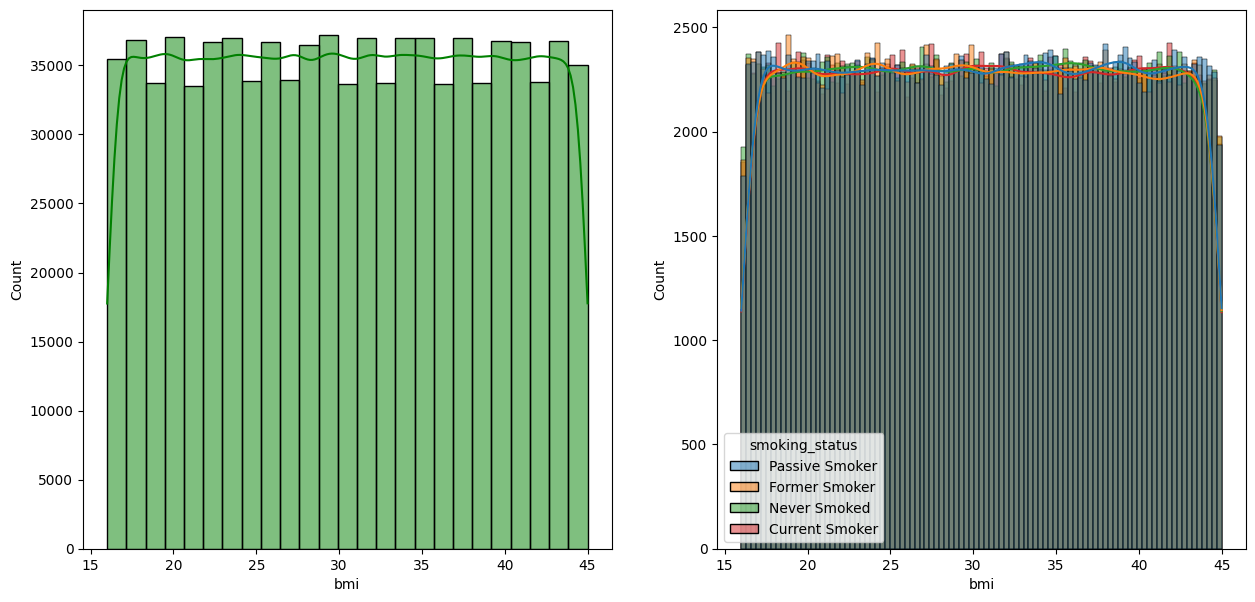

In [19]:
fig, axs= plt.subplots(1,2, figsize = (15,7) )
plt.subplot(121)
sns.histplot(df,x='bmi', bins=25, kde=True, color='g')
plt.subplot(122)
sns.histplot(df, x='bmi', kde = True, hue= 'smoking_status')
plt.show()

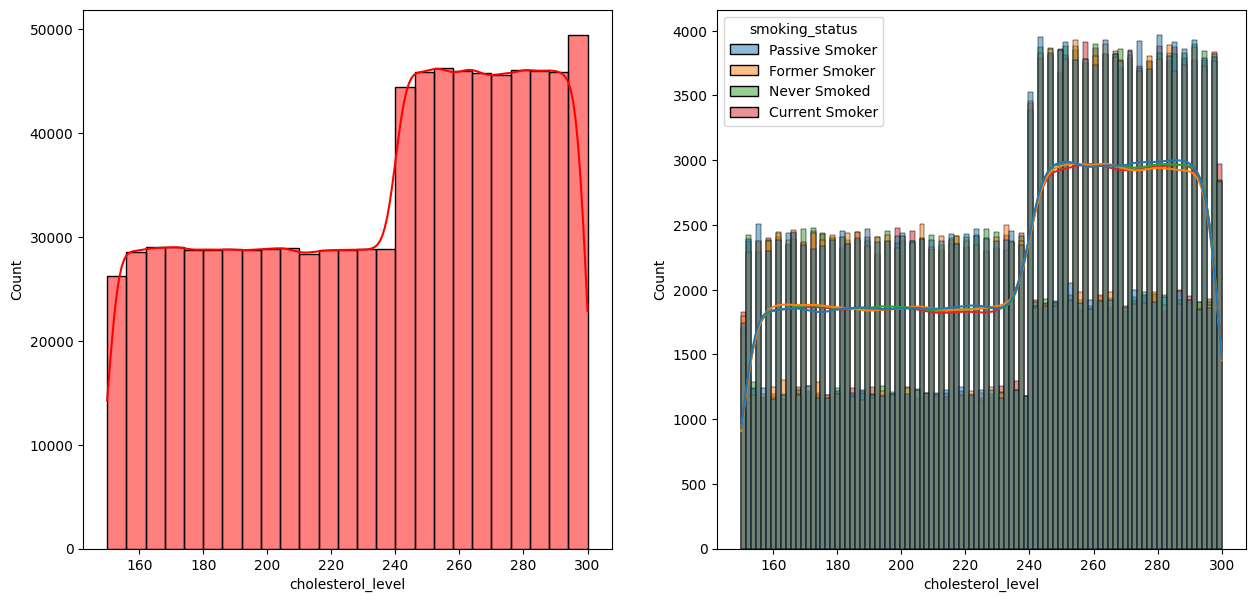

In [20]:
fig, axs= plt.subplots(1,2, figsize = (15,7) )
plt.subplot(121)
sns.histplot(df,x='cholesterol_level', bins=25, kde=True, color='r')
plt.subplot(122)
sns.histplot(df, x='cholesterol_level', kde = True, hue= 'smoking_status')
plt.show()

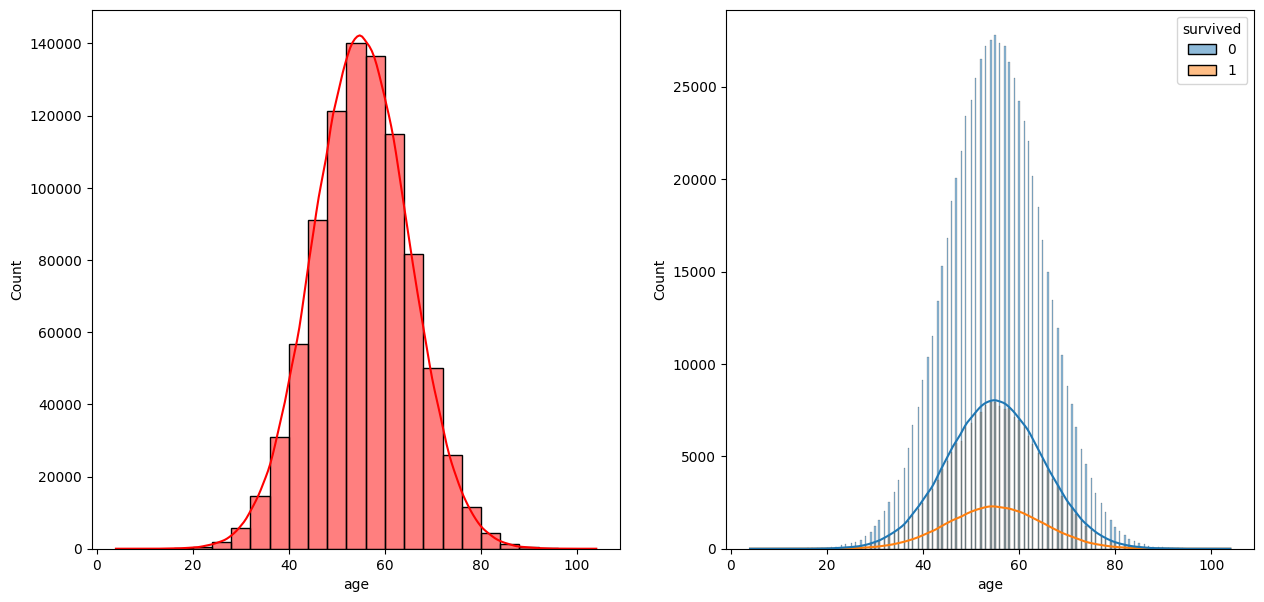

In [21]:
fig, axs= plt.subplots(1,2, figsize = (15,7) )
plt.subplot(121)
sns.histplot(df,x='age', bins=25, kde=True, color='r')
plt.subplot(122)
sns.histplot(df, x='age', kde = True, hue= 'survived')
plt.show()

In [22]:
df.head()

,id,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration
0,1,64.0,Male,Sweden,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0,523 days
1,2,50.0,Female,Netherlands,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1,424 days
2,3,65.0,Female,Hungary,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0,370 days
3,4,51.0,Female,Belgium,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0,443 days
4,5,37.0,Male,Luxembourg,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0,406 days


In [23]:
#df.drop(columns=['id','country'], axis =1 , inplace=True)

df['treatment_duration']= df['treatment_duration'].dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   cancer_stage        890000 non-null  object 
 5   family_history      890000 non-null  object 
 6   smoking_status      890000 non-null  object 
 7   bmi                 890000 non-null  float64
 8   cholesterol_level   890000 non-null  int64  
 9   hypertension        890000 non-null  int64  
 10  asthma              890000 non-null  int64  
 11  cirrhosis           890000 non-null  int64  
 12  other_cancer        890000 non-null  int64  
 13  treatment_type      890000 non-null  object 
 14  survived            890000 non-null  int64  
 15  treatment_duration  890000 non-nul

In [25]:
numerical_columns = ['age', 'bmi', 'cholesterol_level', 'treatment_duration' ]

categorical_columns = ['gender','cancer_stage','family_history','smoking_status','treatment_type']

binary_columns = ['hypertension', 'asthma', 'cirrhosis', 'other_cancer']

from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],
    remainder='passthrough'
)

# Fit and transform in one step
X = df[numerical_columns + categorical_columns + binary_columns]
preprocessor.fit(X)
X_transformed = preprocessor.transform(X)


In [27]:
# Get one-hot encoded column names
ohe_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine with numeric + binary columns
all_columns = numerical_columns + list(ohe_columns) + binary_columns

# Convert to DataFrame

X_transformed_df = pd.DataFrame(X_transformed, columns=all_columns)


In [28]:
X_transformed_df.head()

,age,bmi,cholesterol_level,treatment_duration,gender_Male,cancer_stage_Stage II,cancer_stage_Stage III,cancer_stage_Stage IV,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery,hypertension,asthma,cirrhosis,other_cancer
0,0.899796,-0.130748,-0.797424,0.465906,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.500977,1.279296,1.067550,-0.244658,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.999851,1.613882,0.791257,-0.632238,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.400922,1.494387,0.169599,-0.108287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-1.801696,-1.289852,-1.280936,-0.373851,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
correlation_mat = X_transformed_df.corr()

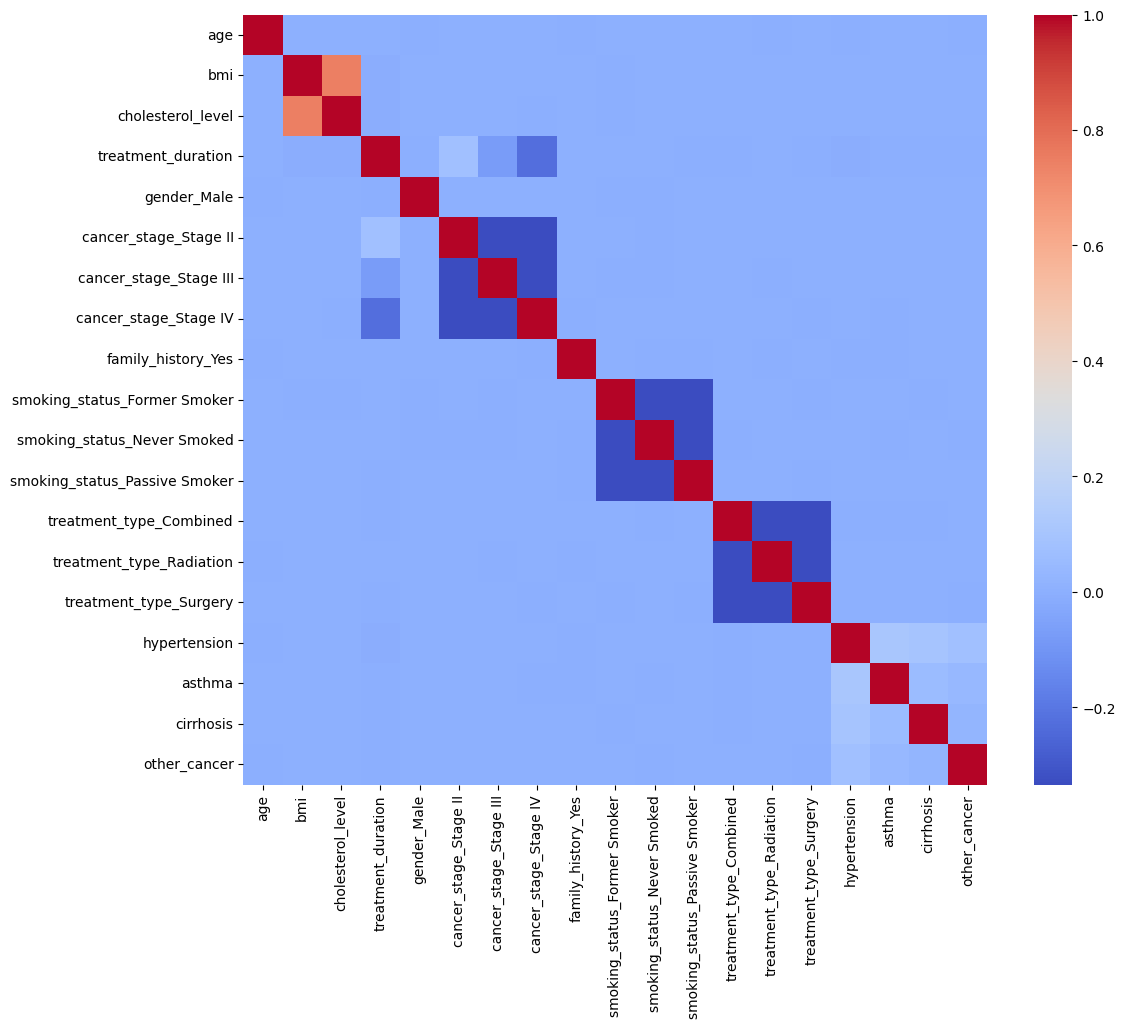

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_mat, cmap='coolwarm', annot=False)
plt.show()
